    Mel0708A2_B2SZ348--lb895[ep10]_908[ep36]

In [25]:
PRFX = 'MelEsmb0709A1'
PRFX_B4='Mel0708A2'


In [36]:
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pathlib import Path

p_cmp = '../input/siim-isic-melanoma-classification'
p_b4 = f'../output/{PRFX_B4}'
p_out = f'../output/{PRFX}'; Path(p_out).mkdir(exist_ok=True,parents=True)

class Param: pass

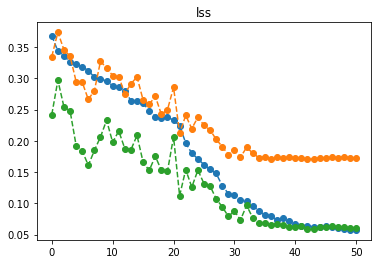

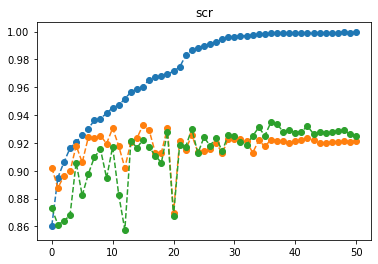

best_scr 0.9330; best_epc 15; best_scr20 0.9348; best_epc20 36


In [37]:
res = pickle.load(open(f'{p_b4}/results_{PRFX_B4}.p', 'rb'))

res['param'].__dict__
stats=res['stats']

for mtrc in ['lss', 'scr']:
    recs=stats[mtrc]
    for tv,vs in recs.items():
        plt.title(f'{mtrc}')
        plt.plot(vs, 'o--')
    plt.show()

print(f'best_scr {stats["best_scr"]:.4f}; best_epc {stats["best_epc"]}; best_scr20 {stats["best_scr20"]:.4f}; best_epc20 {stats["best_epc20"]}')

In [38]:
pd.DataFrame(stats['scr']).sort_values('vl20', ascending=False).head(20)

,tr,vl,vl20
36,0.998623,0.922336,0.934844
37,0.998684,0.921704,0.933758
42,0.999152,0.923287,0.931980
34,0.998005,0.921824,0.931151
23,0.986586,0.925553,0.930115
39,0.998936,0.919729,0.929267
48,0.999523,0.921539,0.928922
47,0.999313,0.920405,0.928542
46,0.999274,0.920532,0.928189
41,0.999245,0.921972,0.927996


In [63]:
ls $p_b4 | grep .csv

submission_Mel0708A2_fld_0_best.csv
submission_Mel0708A2_fld_0_best20.csv
submission_Mel0708A2_fld_0_epc_10.csv
submission_Mel0708A2_fld_0_epc_13.csv
submission_Mel0708A2_fld_0_epc_15.csv
submission_Mel0708A2_fld_0_epc_19.csv
submission_Mel0708A2_fld_0_epc_23.csv
submission_Mel0708A2_fld_0_epc_34.csv
submission_Mel0708A2_fld_0_epc_36.csv
submission_Mel0708A2_fld_0_epc_8.csv


In [40]:
sub1 = pd.read_csv(f'{p_b4}/submission_{PRFX_B4}_fld_0_epc_10.csv')
sub2 = pd.read_csv(f'{p_b4}/submission_{PRFX_B4}_fld_0_epc_36.csv')

In [54]:
print(sub1.target.mean())
sub1.head()

0.19195821031014246


,image_name,target
0,ISIC_0052060,0.021451
1,ISIC_0052349,0.026557
2,ISIC_0058510,0.055107
3,ISIC_0073313,0.021615
4,ISIC_0073502,0.328637


In [55]:
print(sub2.target.mean())
sub2.head()

0.053807459091068294


,image_name,target
0,ISIC_0052060,0.000904
1,ISIC_0052349,0.003664
2,ISIC_0058510,0.003765
3,ISIC_0073313,0.013956
4,ISIC_0073502,0.001567


In [56]:
dfsub = pd.read_csv(f'{p_cmp}/sample_submission.csv') 

In [57]:
sub1.shape, dfsub.shape

((10982, 2), (10982, 2))

In [58]:
dfsub.target = np.mean([sub1.target.values,sub2.target.values],0)

In [59]:
print(dfsub.target.mean())
dfsub.head()


0.12288283470060613


,image_name,target
0,ISIC_0052060,0.011177
1,ISIC_0052349,0.015110
2,ISIC_0058510,0.029436
3,ISIC_0073313,0.017786
4,ISIC_0073502,0.165102


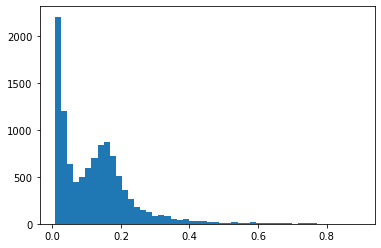

In [61]:
plt.hist(dfsub.target, bins=50);

In [62]:
dfsub.to_csv(f'{p_out}/submission_{PRFX}.csv', index=False)